# This is the file for our classification modeling for the TYPE II DM Prediction

Given our dataset with the missing values generated, we now write code to generate the classification models for the prediction of Type II DM.

In [1]:
# Load the necessary data packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier



In [18]:
# Import the dataset we got
df_DM = pd.read_csv("T2DM_MissingFilled_FINALVERSION.csv")


df_DM['DM'] = df_DM['DM'].replace(3, 2)
df_DM['DM'] = df_DM['DM'].replace(9, 2)
df_DM['DM'] = df_DM['DM'].replace(2, 0)
categorical_cols = ['Race']

# Perform one-hot encoding
df_DM_encoded = pd.get_dummies(df_DM, columns=categorical_cols)


# get our features and response
X = df_DM_encoded.drop(['ID', 'DM', 'PA','Alcohol','Systolic','Menopause'], axis=1)
y = df_DM_encoded['DM']
# separate into training and testing dataset
# I use random state to be 42 so that our traning and testing data for reproductivity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
SVM = SVC(kernel='poly', C=1, class_weight='balanced', probability=True)

SVM_model = BaggingClassifier(estimator=SVM, n_estimators=20, random_state=42)

# Train the model
SVM_model.fit(X_train, y_train)



BaggingClassifier(estimator=SVC(C=1, class_weight='balanced', kernel='poly',
                                probability=True),
                  n_estimators=20, random_state=42)

In [19]:
y_pred = SVM_model.predict(X_train)
y_prob = SVM_model.predict_proba(X_train)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report to see precision, recall, and F1-score
print(classification_report(y_train, y_pred))




y_pred = SVM_model.predict(X_test)
y_prob = SVM_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report to see precision, recall, and F1-score
print(classification_report(y_test, y_pred))


# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")



# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc_value = roc_auc_score(y_test, y_prob)  


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3650
           1       0.50      0.07      0.12       668

    accuracy                           0.85      4318
   macro avg       0.68      0.53      0.52      4318
weighted avg       0.80      0.85      0.79      4318

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       912
           1       0.44      0.05      0.09       168

    accuracy                           0.84      1080
   macro avg       0.65      0.52      0.50      1080
weighted avg       0.79      0.84      0.79      1080

Specificity: 0.99


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       912
           1       0.45      0.08      0.13       168

    accuracy                           0.84      1080
   macro avg       0.65      0.53      0.52      1080
weighted avg       0.79      0.84      0.79      1080

Specificity: 0.98


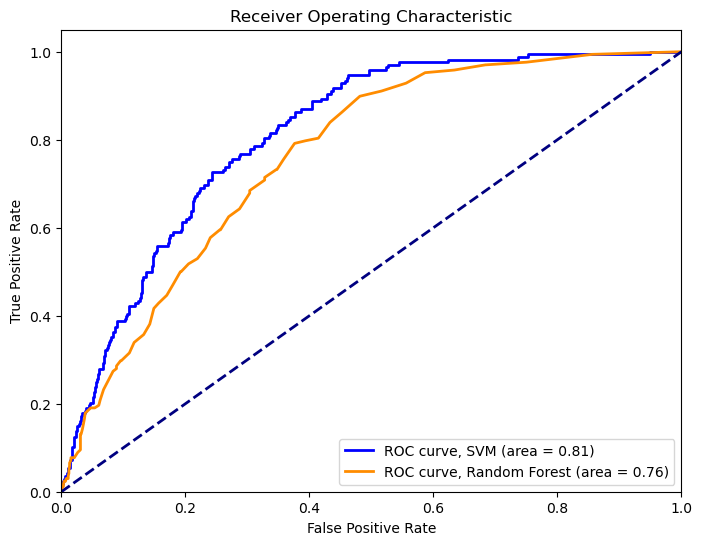

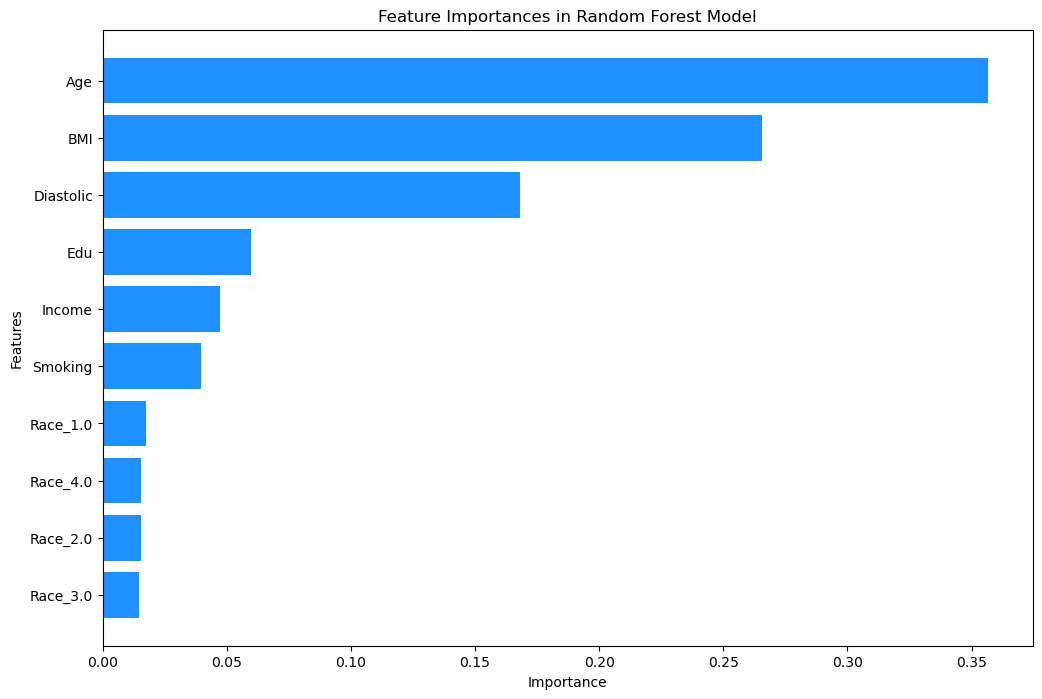

In [22]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Generate a classification report to see precision, recall, and F1-score
print(classification_report(y_test, y_pred_rf))


# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")



# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculate the AUC
auc_value_rf = roc_auc_score(y_test, y_prob_rf)  

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve, SVM (area = {auc_value:.2f})')
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve, Random Forest (area = {auc_value_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


feature_importances = random_forest_model.feature_importances_
feature_names = X_train.columns
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()